In [1]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
from charon import profile
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import ClumpyReader, Spectra_generator, Spectra_interpolation, Flux_generator, J_interpolation, Flux_interpolation, Signal_PDF, Background_PDF
from LikelihoodFunctions import Sensitivity, Background_cut
from ipynb.fs.full.func_plot_histo import plot_projections
from scipy.interpolate import interp1d
import random as rd
from scipy.stats import binned_statistic

In [2]:
resp_matrix_data = np.load('/home/dvaldenaire/Python/Analysis/Response matrix/Resp_MC1122_logE.pkl',allow_pickle=True, encoding="latin1")
Reco_mass_edges = np.log10(resp_matrix_data['Bin']['reco_energy_edges'])
Reco_theta_edges = resp_matrix_data['Bin']['reco_psi_edges']
E_reco_center=resp_matrix_data['Bin']['reco_energy_center']
Theta_reco = resp_matrix_data['Bin']['reco_psi_center']

In [3]:
mass = 1e7
channel = 'nuenue'
process = 'decay'

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


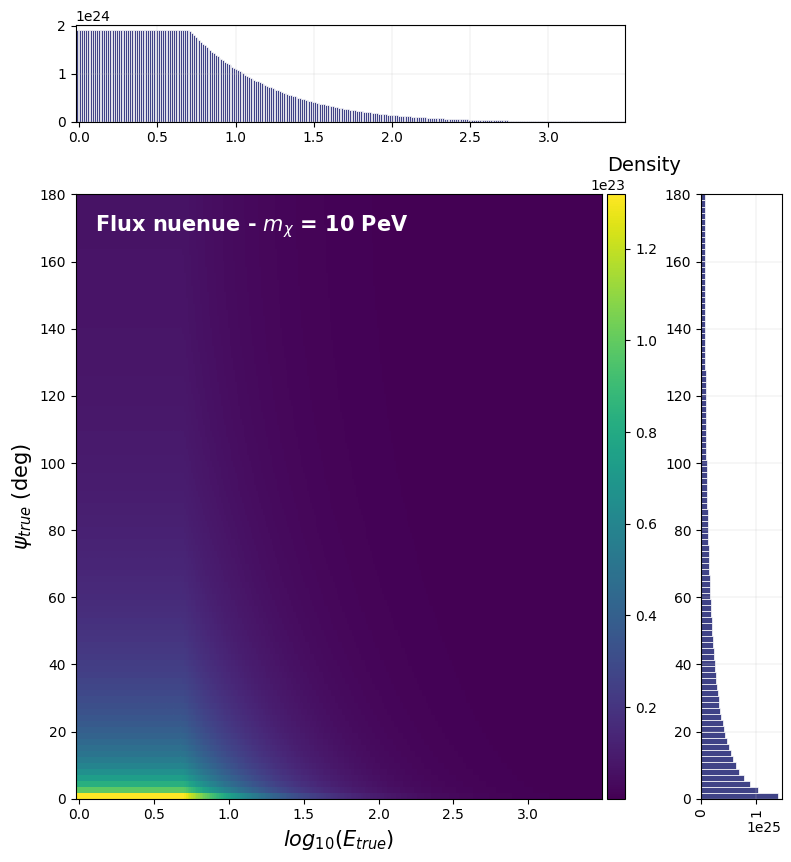

In [4]:
Reco_rate_nue_NFW1 = Signal_PDF(mass=mass, channel=channel,process=process,galactic_profile=profile.NFW, extrapolation=False, normalize=False)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


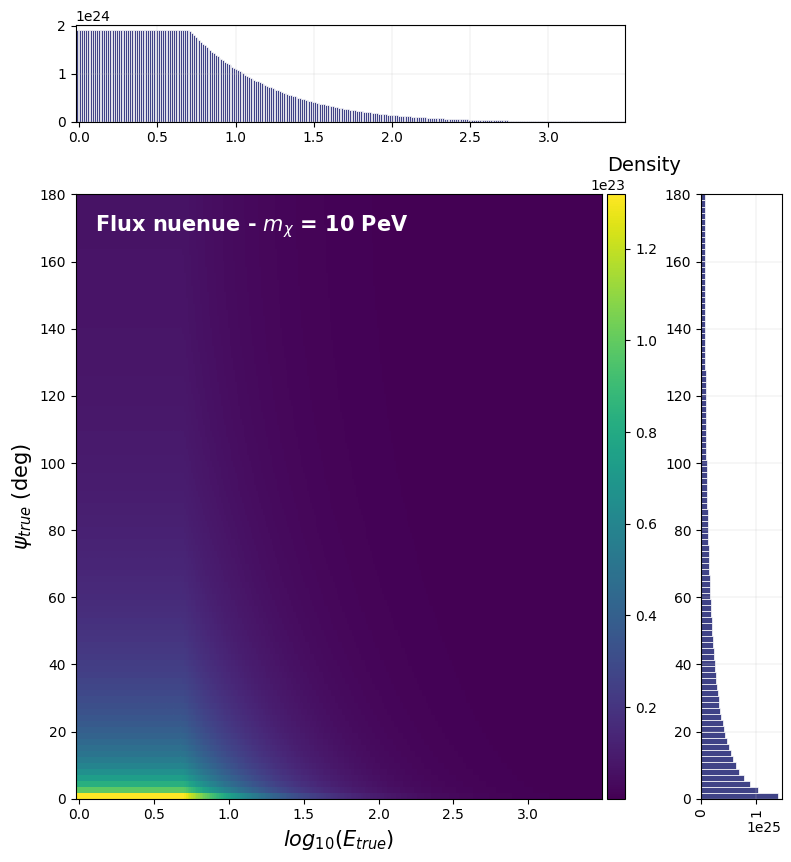

In [5]:
Reco_rate_nue_NFW1_norm = Signal_PDF(mass=mass, channel=channel,process=process,galactic_profile=profile.NFW, extrapolation=False, normalize=True)

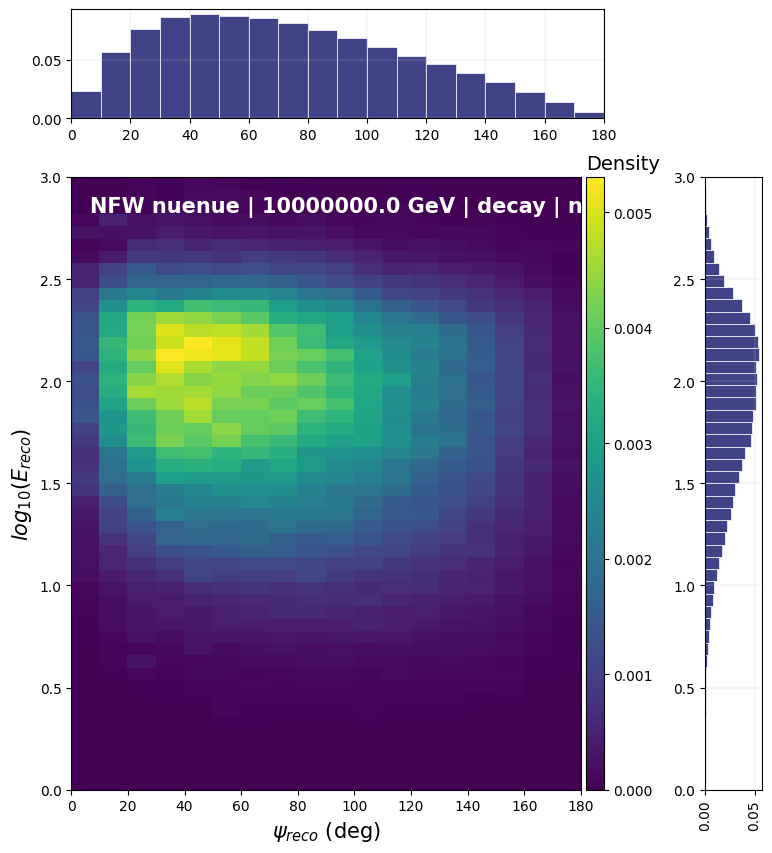

In [6]:
plot_projections(Reco_rate_nue_NFW1_norm,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','NFW {0} | {1} GeV | {2} | norm'.format(channel, mass, process))

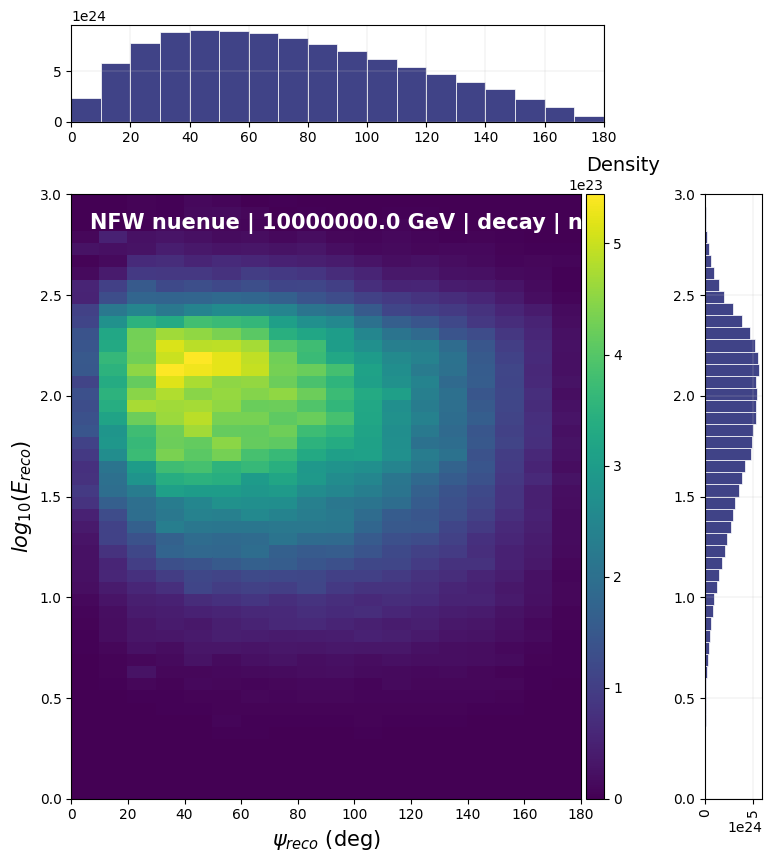

In [7]:
plot_projections(Reco_rate_nue_NFW1,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','NFW {0} | {1} GeV | {2} | norm'.format(channel, mass, process))

In [8]:
RecoRateProjThetaNorm, RecoRateProjEnergyNorm = Reco_rate_nue_NFW1_norm.T.sum(axis=0), Reco_rate_nue_NFW1_norm.T.sum(axis=1)

In [9]:
RecoRateProjTheta, RecoRateProjEnergy = Reco_rate_nue_NFW1.T.sum(axis=0), Reco_rate_nue_NFW1.T.sum(axis=1)

In [10]:
Background = Background_cut()
BackgroundNorm = Background/np.sum(Background)

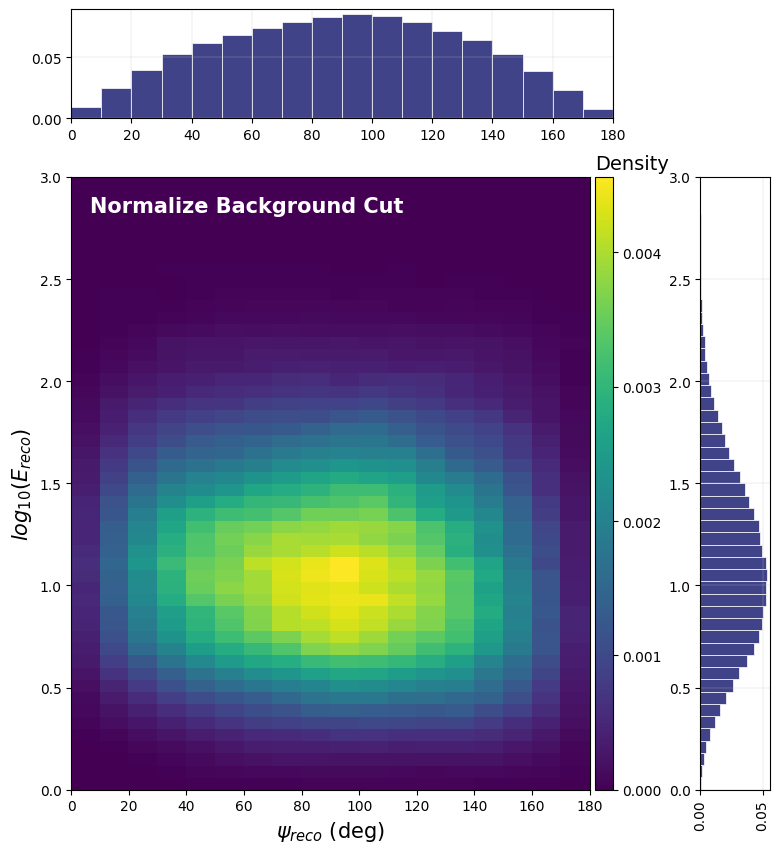

In [11]:
plot_projections(BackgroundNorm,(Reco_theta_edges, Reco_mass_edges) ,'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$', 'Normalize Background Cut')

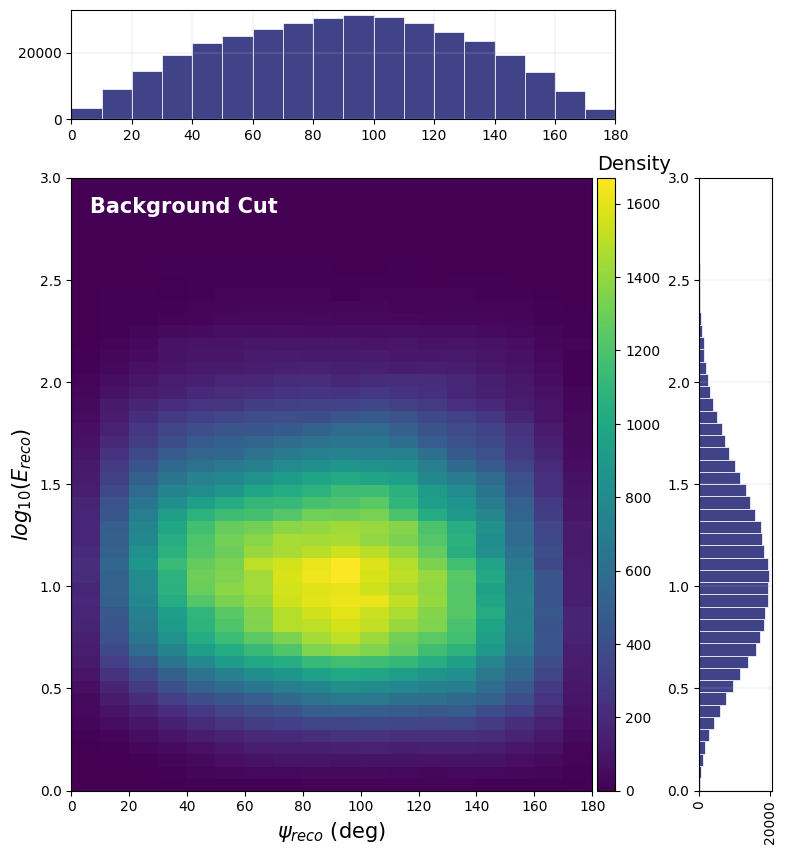

In [12]:
plot_projections(Background,(Reco_theta_edges, Reco_mass_edges) ,'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$', 'Background Cut')

In [13]:
BackgroundProjTheta, BackgroundProjEnergy = Background.T.sum(axis=0), Background.T.sum(axis=1)

In [14]:
BackgroundProjThetaNorm, BackgroundProjEnergyNorm = BackgroundNorm.T.sum(axis=0), BackgroundNorm.T.sum(axis=1)

Text(0.0, 0.045, '$m_\\chi = 10^{4}$ GeV')

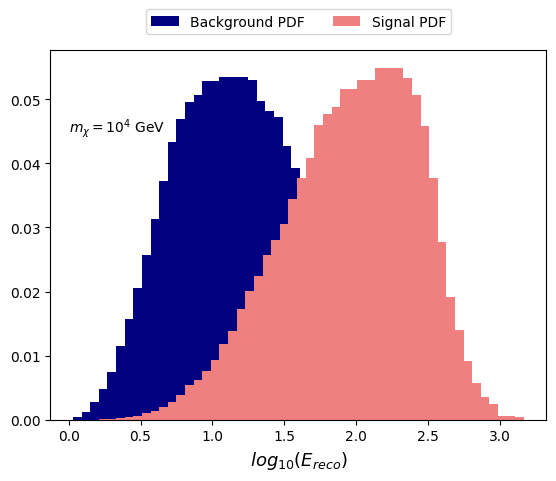

In [16]:
plt.bar(np.log10(E_reco_center),BackgroundProjEnergyNorm, width=0.2, align='edge', label='Background PDF', color='navy')
plt.bar(np.log10(E_reco_center),RecoRateProjEnergyNorm, width=0.2, align='edge', label='Signal PDF', color='lightcoral')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncols=2, fancybox=True, shadow=False)
plt.xlabel(r'$log_{10}(E_{reco})$', fontsize=13)
plt.text(0.,0.045,'$m_\chi = 10^{4}$ GeV')

In [ ]:
plt.bar(Theta_reco,BackgroundProjThetaNorm, width=9, align='edge', label='Background PDF', color='navy')
plt.bar(Theta_reco,RecoRateProjThetaNorm, width=9, align='edge', label='Signal PDF', color='lightcoral')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncols=2, fancybox=True, shadow=False)
plt.xlabel(r'$\psi_{reco}$ (deg)', fontsize=13)
plt.text(140,0.08,'$m_\chi = 10^{4}$ GeV')

In [ ]:
BackgroundProjEnergy[24]

In [ ]:
print(Background95Percentile)

In [ ]:
plt.bar(E_reco_center,BackgroundProjEnergyNorm, width=5, align='edge', label='Background PDF', color='navy')
#plt.vlines(np.log10(Background5Percentile),0.0,0.08,linestyles='dashdot',label='5%',color='lightcoral')
#plt.vlines(np.log10(Background95Percentile),0.0,0.08,linestyles='dashdot',label='95%',color='lightcoral')
plt.vlines(BackgroundMedian,0.0,0.08,linestyles='dashdot',label='50%',color='red')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncols=4, fancybox=True, shadow=False)
plt.xlabel(r'$log_{10}(E_{reco})$', fontsize=13)
plt.semilogx()